<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [37]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
reds = pd.read_csv('./reds.txt', sep=',',header=None).values.transpose()[1]
blues = pd.read_csv('./blues.txt', sep=',',header=None).values.transpose()[1]

a = [x for x in range(800)]
red_pairs=np.array([[i, reds[i]] for i in range(800)])
blue_pairs=np.array([[i, blues[i]] for i in range(800)])

Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

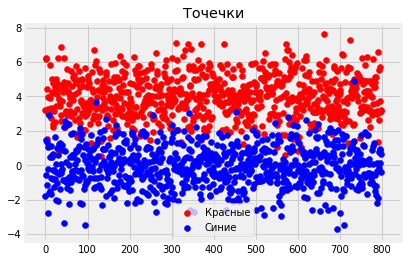

In [39]:
plt.scatter(a, reds, label='Красные', color='r')
plt.scatter(a, blues, label='Синие', color='b')
plt.title('Точечки')
plt.legend()
plt.show()

 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

In [42]:
def guess_class(x,y,k):
    '''
        Функция отрисовки окрестности точки (x,y) и функция поиска расстояния между точками b,c на плоскости
    '''
    def draw_points(x,y):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a, reds, color='r')
        plt.scatter(a, blues, color='b')
        plt.scatter(x,y)
        plt.xlim(x-4, x+4)
        plt.ylim(y-4, y+4)
    draw_points(x,y)
    
    def distance_2d(b,c):
         return np.sqrt((x-b)**2 + (x-c)**2)
        
    def calculate_k_distances(class_points):
        l = []
        for i in class_points[x-4:x+5]:
            l.append(distance_2d(*i))
        return sorted(l)[:k]
             
    b = np.array(calculate_k_distances(blue_pairs)) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(red_pairs)) # расстояния до ближайших k соседей класса red
    
    b_score, r_score = 0, 0
    
    for value in sorted([*b, *r])[:k]: # выявляем наибольшее совпадение
        if value in b:
            b_score += 1 / value
        else:
            r_score += 1 / value
    
    if b_score > r_score:
        plt.scatter(x, y, color="b")
    else:
        plt.scatter(x, y, color="r")
    

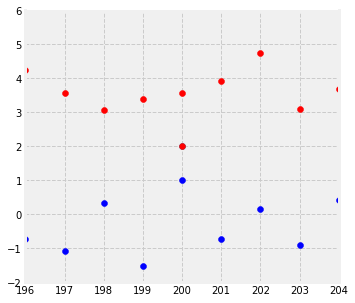

In [43]:
guess_class(200,2,3)